In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")


In [4]:
file_1 = "api_data_aadhar_biometric_500000_1000000.csv"
file_2 = "api_data_aadhar_biometric_1500000_1861108.csv"
file_3 = "api_data_aadhar_biometric_0_500000.csv"
file_4 = "api_data_aadhar_biometric_1000000_1500000.csv"

df1 = pd.read_csv(file_1)
df2 = pd.read_csv(file_2)
df3 = pd.read_csv(file_3)
df4 = pd.read_csv(file_4)
print("Dataset 1 Shape:", df1.shape)
print("Dataset 2 Shape:", df2.shape)
print("Dataset 3 Shape:", df3.shape)
print("Dataset 4 Shape:", df4.shape)


Dataset 1 Shape: (500000, 6)
Dataset 2 Shape: (361108, 6)
Dataset 3 Shape: (500000, 6)
Dataset 4 Shape: (500000, 6)


In [5]:
df = pd.concat([df1, df2,df3,df4], ignore_index=True)
print("Combined Dataset Shape:", df.shape)


Combined Dataset Shape: (1861108, 6)


In [6]:
df.head()


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,19-09-2025,Goa,North Goa,403502,0,4
1,19-09-2025,Goa,North Goa,403508,1,4
2,19-09-2025,Goa,North Goa,403513,2,0
3,19-09-2025,Goa,North Goa,403527,2,2
4,19-09-2025,Goa,South Goa,403601,7,3


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


In [8]:
df.isnull().sum()


date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df.fillna(0, inplace=True)

# Convert date column (example)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')


C:\Users\nandi\AppData\Local\Temp\ipykernel_14892\2883579568.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [11]:
print(df.columns.tolist())


['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']


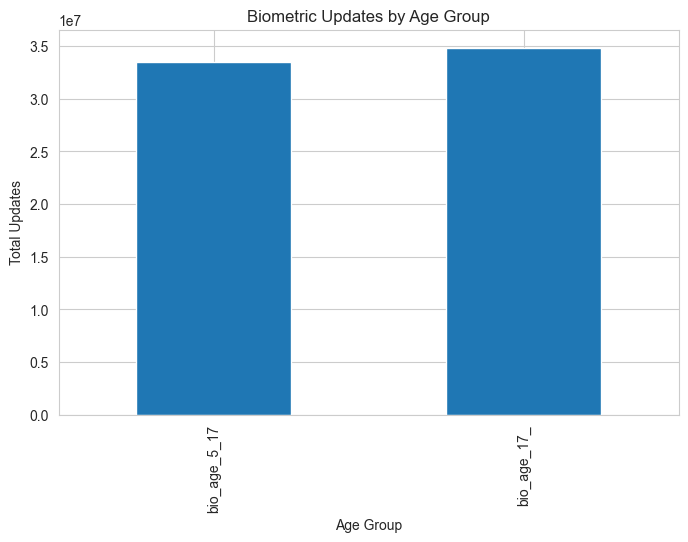

In [22]:
age_summary = df[['bio_age_5_17', 'bio_age_17_']].sum()

plt.figure(figsize=(8,5))
age_summary.plot(kind='bar')

plt.title("Biometric Updates by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Updates")

# 🔹 SAVE THE FIGURE
plt.savefig("biometric_updates_by_age_group.png", dpi=300, bbox_inches='tight')

plt.show()


In [14]:
df_long = df.melt(
    id_vars=['date', 'state', 'district', 'pincode'],
    value_vars=['bio_age_5_17', 'bio_age_17_'],
    var_name='Age_Group',
    value_name='Biometric_Updates'
)

df_long.head()


,date,state,district,pincode,Age_Group,Biometric_Updates
0,2025-09-19,Goa,North Goa,403502,bio_age_5_17,0
1,2025-09-19,Goa,North Goa,403508,bio_age_5_17,1
2,2025-09-19,Goa,North Goa,403513,bio_age_5_17,2
3,2025-09-19,Goa,North Goa,403527,bio_age_5_17,2
4,2025-09-19,Goa,South Goa,403601,bio_age_5_17,7


In [15]:
state_age = df_long.groupby(['state', 'Age_Group'])['Biometric_Updates'].sum().unstack()

state_age.head()


Age_Group,bio_age_17_,bio_age_5_17
state,,
Andaman & Nicobar Islands,1879,382
Andaman and Nicobar Islands,6761,10972
Andhra Pradesh,1429187,2181549
Arunachal Pradesh,28916,41143
Assam,371044,574106


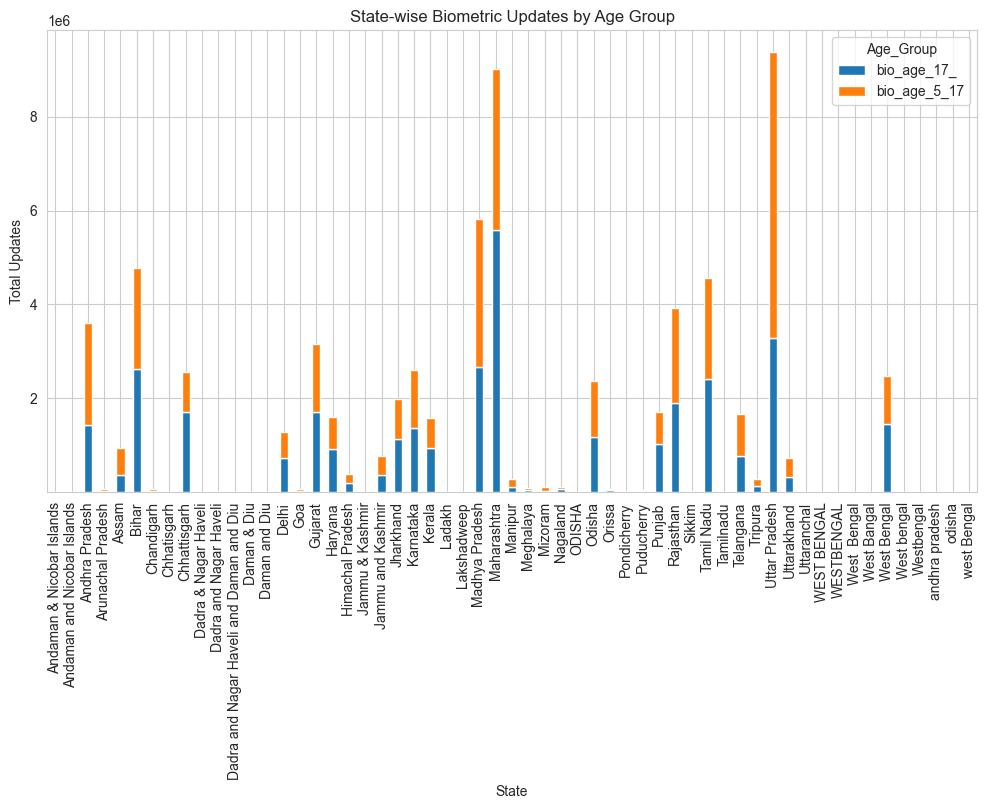

In [16]:
state_age.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("State-wise Biometric Updates by Age Group")
plt.xlabel("State")
plt.ylabel("Total Updates")
plt.show()


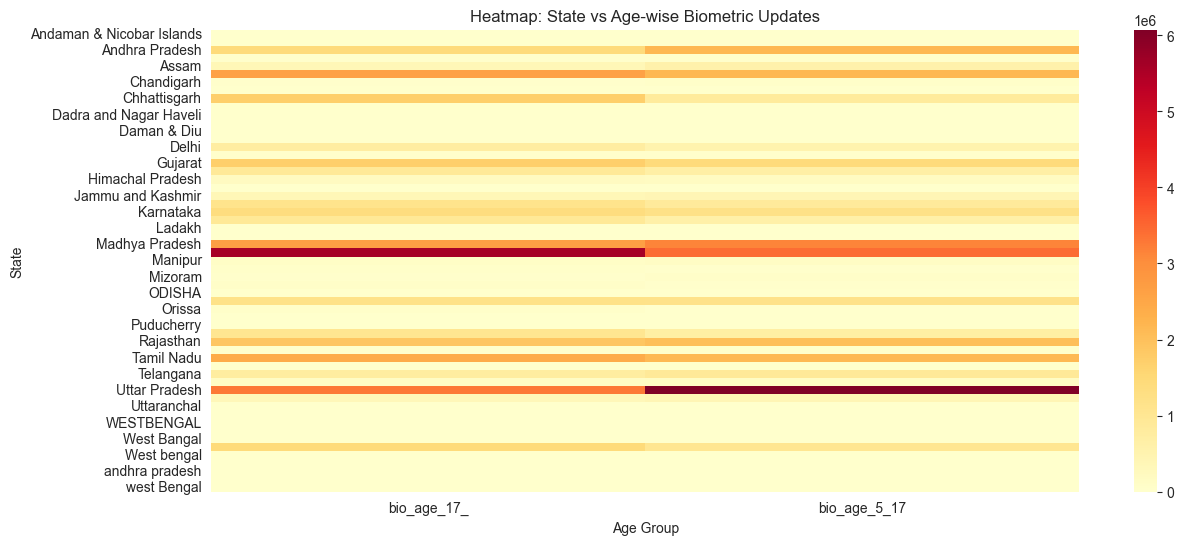

In [17]:
plt.figure(figsize=(14,6))
sns.heatmap(state_age, cmap="YlOrRd")
plt.title("Heatmap: State vs Age-wise Biometric Updates")
plt.xlabel("Age Group")
plt.ylabel("State")
plt.show()


In [18]:
district_age = df_long.groupby(['district', 'Age_Group'])['Biometric_Updates'].sum().unstack()

district_age.sort_values(by='bio_age_17_', ascending=False).head(10)


Age_Group,bio_age_17_,bio_age_5_17
district,,
Thane,361166,198145
Nashik,353492,208401
Pune,316149,277443
Mumbai,278332,116741
Jalgaon,262402,145699
Aurangabad,244229,153054
Ahmedabad,236127,163075
Nagpur,232553,110440
Amravati,229432,101826


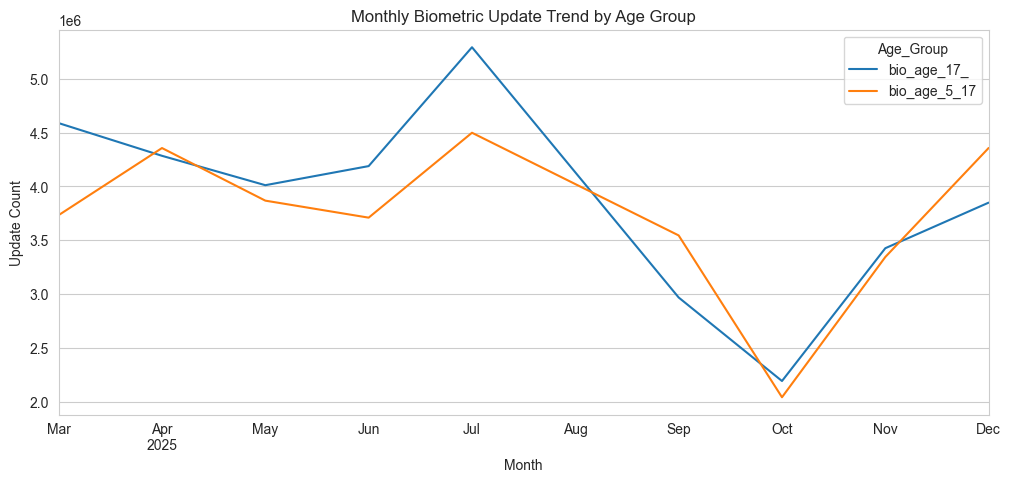

In [19]:
df_long['Month'] = df_long['date'].dt.to_period('M')

monthly_trend = df_long.groupby(['Month', 'Age_Group'])['Biometric_Updates'].sum().unstack()

monthly_trend.plot(figsize=(12,5))
plt.title("Monthly Biometric Update Trend by Age Group")
plt.xlabel("Month")
plt.ylabel("Update Count")
plt.show()


In [21]:
state_total = state_age.sum(axis=1)

mean = state_total.mean()
std = state_total.std()

z_scores = (state_total - mean) / std

anomalous_states = state_total[abs(z_scores) > 2]

print("Anomalous States (Unusual Update Activity):")
print(anomalous_states)


Anomalous States (Unusual Update Activity):
state
Madhya Pradesh    5819736
Maharashtra       9020710
Uttar Pradesh     9367083
dtype: int64
